# Studi kasus menggunakan algoritma Logistic

## 1. Import library

In [140]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 2. Data preparation

In [141]:
data = pd.read_csv("car.csv")

## 3. EDA

In [142]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0


In [143]:
data.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [144]:
correl = data.corr()
print(correl)

               User ID    Gender       Age  AnnualSalary  Purchased
User ID       1.000000  0.039164  0.017647      0.006541   0.015911
Gender        0.039164  1.000000  0.084760      0.063301   0.047211
Age           0.017647  0.084760  1.000000      0.166042   0.616036
AnnualSalary  0.006541  0.063301  0.166042      1.000000   0.364974
Purchased     0.015911  0.047211  0.616036      0.364974   1.000000


<Axes: >

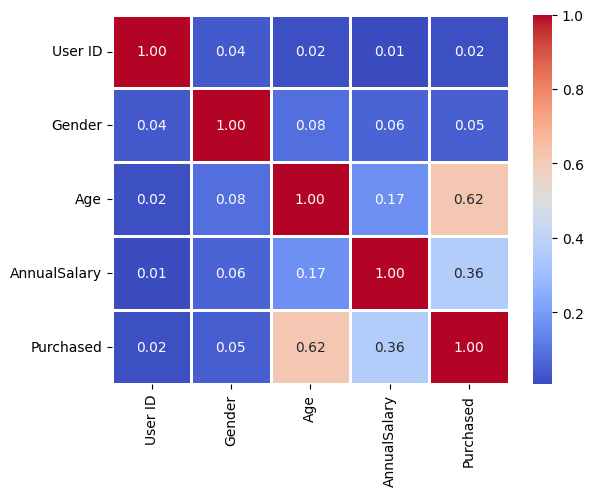

In [145]:
sns.heatmap(correl, cmap="coolwarm", annot=True, fmt=".2f", linecolor='white', linewidths=2)

<Axes: >

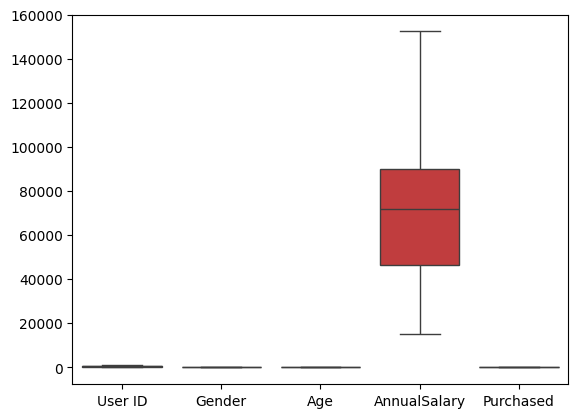

In [146]:
sns.boxplot(data)

## 4. Modeling

### 4.1 Data preprocessing

In [147]:
X = data[['Age', 'AnnualSalary']]
y = data['Purchased']

In [148]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

In [158]:
X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[ 1.        ,  1.        , -0.47711966, -1.52849808],
       [ 1.        ,  1.        , -0.00990495, -0.84676745],
       [ 1.        ,  1.        ,  0.83108153,  0.03803187],
       ...,
       [ 1.        ,  1.        , -1.13122026,  1.90916486],
       [ 1.        ,  1.        ,  0.73763859,  1.77862069],
       [ 1.        ,  1.        ,  0.36386682,  0.02352696]])

In [150]:
n_samples, n_features = X.shape
weights = np.zeros(n_features)
learning_rate = 0.01
n_iterations = 1000

### 4.2 Menggunakan fungsi perulangan sigmoid

In [151]:
# Definisi fungsi sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent untuk Logistic Regression
for i in range(n_iterations):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    errors = predictions - y
    gradient = np.dot(X.T, errors) / n_samples
    weights -= learning_rate * gradient

## 5. Evaluasi

Accuracy: 82.60%


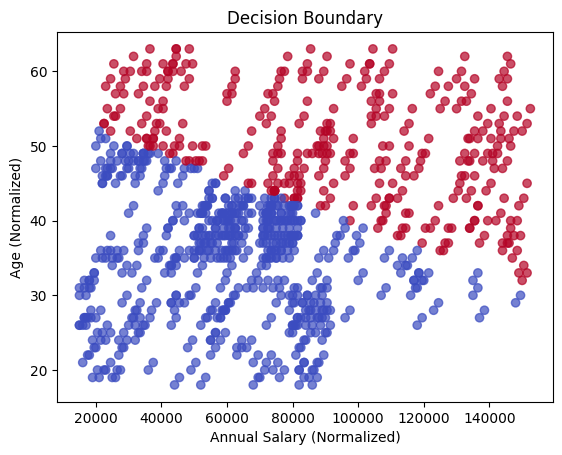

In [152]:
# Prediksi dan evaluasi
def predict(X, weights):
    return (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)

y_pred = predict(X, weights)

# Akurasi
accuracy = np.mean(y_pred == y) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Visualisasi keputusan
plt.scatter(data['AnnualSalary'], data['Age'], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.title("Decision Boundary")
plt.xlabel("Annual Salary (Normalized)")
plt.ylabel("Age (Normalized)")
plt.show()

### 5.1 Menghitung jumlah aktual dan prediksi penjualan

In [153]:
actual_positive = np.sum(y)  # Jumlah mobil benar-benar terjual
actual_negative = len(y) - actual_positive  # Tidak terjual

predicted_positive = np.sum(y_pred)  # Mobil diprediksi terjual
predicted_negative = len(y_pred) - predicted_positive  # Tidak terjual

In [154]:
print(f"Jumlah Mobil Terjual (Actual): {actual_positive}")
print(f"Jumlah Mobil Tidak Terjual (Actual): {actual_negative}")
print(f"Jumlah Mobil Terjual (Predicted): {predicted_positive}")
print(f"Jumlah Mobil Tidak Terjual (Predicted): {predicted_negative}")

Jumlah Mobil Terjual (Actual): 402
Jumlah Mobil Tidak Terjual (Actual): 598
Jumlah Mobil Terjual (Predicted): 352
Jumlah Mobil Tidak Terjual (Predicted): 648


### 5.2 Menghitung dengan matrik

In [155]:
# Hitung metrik evaluasi
true_positive = np.sum((y_pred == 1) & (y == 1))
false_positive = np.sum((y_pred == 1) & (y == 0))
false_negative = np.sum((y_pred == 0) & (y == 1))
true_negative = np.sum((y_pred == 0) & (y == 0))

precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [156]:
print("\nEvaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Evaluation Metrics:
Precision: 0.82
Recall: 0.72
F1-Score: 0.77


## 6. Visualisas

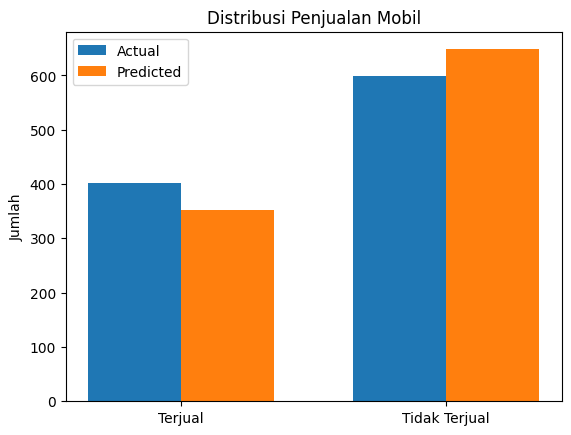

In [157]:
labels = ['Terjual', 'Tidak Terjual']
actual_counts = [actual_positive, actual_negative]
predicted_counts = [predicted_positive, predicted_negative]

x = np.arange(len(labels))  # Lokasi label
width = 0.35  # Lebar bar

fig, ax = plt.subplots()
ax.bar(x - width/2, actual_counts, width, label='Actual')
ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_ylabel('Jumlah')
ax.set_title('Distribusi Penjualan Mobil')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()